In [22]:
## Import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf 
import xgboost as xgb 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Importing Data

In [12]:
biomass = pd.read_csv("dataset/Biomass_History.csv")
distance = pd.read_csv("dataset/Distance_Matrix.csv")


# 1.- Data Exploration

## 1.1 Biomass

In [16]:
biomass.drop('Index', axis=1, inplace=True)

In [20]:
biomass.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


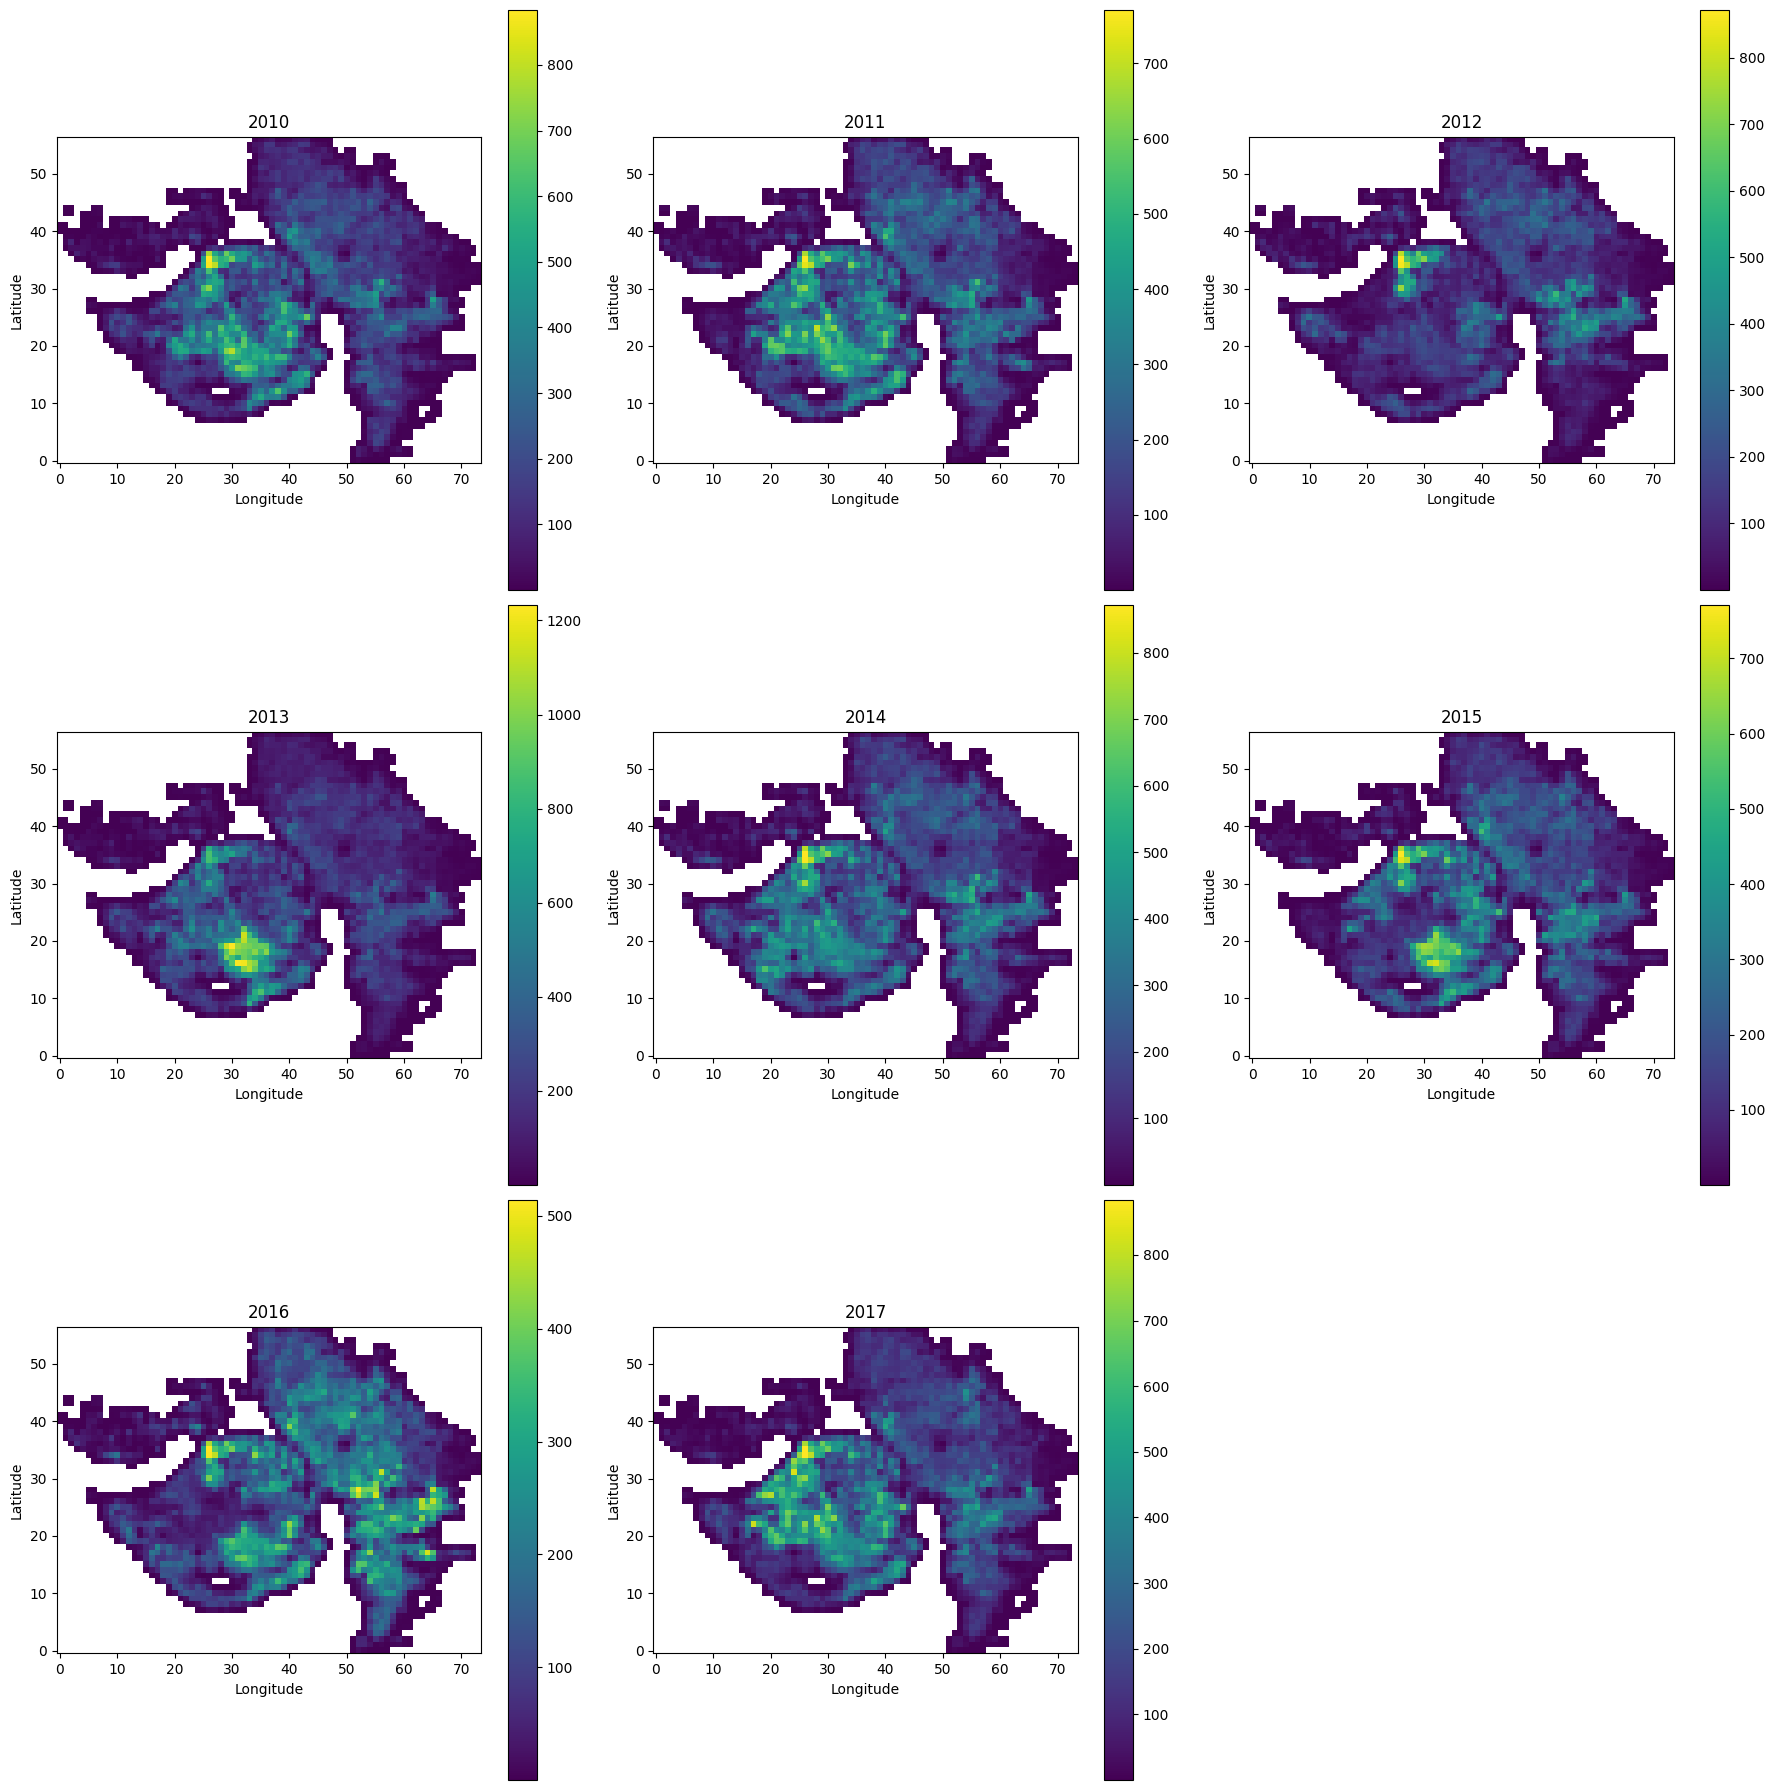

In [44]:
# Define colors for each year
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()


# Plot each year's data in a separate subplot
years = biomass.columns[2:]
for i, year in enumerate(years):
    heatmap_data = biomass.pivot_table(values=year, index='Latitude', columns='Longitude')
    im = axs[i].imshow(heatmap_data, cmap='viridis', interpolation='nearest', origin='lower')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_title(year)
    axs[i].grid(False)
    fig.colorbar(im, ax=axs[i])

# Hide any remaining empty subplots (if the number of years is less than 9)
for i in range(len(years), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()